In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats.mstats import winsorize
import numpy as np
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [43]:
df = pd.read_csv('./dataset/윈저데이터셋.csv', encoding='CP949')

In [21]:
df

,회사명,거래소코드,회계년도,상장일,상장폐지일,산업명,소속코드,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,...,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,month,label
0,(주)CMG제약,58820,2011-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,56.40,-5.90,-12.89,...,128.51,19.56,89.82,10.18,-43.44,1.77,3.530000,2011,12,0
1,(주)CMG제약,58820,2012-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,-8.43,-4.12,-16.43,...,10.67,1.66,184.40,-84.40,-181.31,1.71,-7.750000,2012,12,0
2,(주)CMG제약,58820,2013-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,25.51,16.09,77.05,...,289.40,34.29,71.28,28.72,4.23,2.03,0.700000,2013,12,0
3,(주)CMG제약,58820,2014-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,11.52,74.30,68.15,...,132.06,31.04,79.30,20.70,2.24,1.54,3.600000,2014,12,0
4,(주)CMG제약,58820,2015-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,18.85,-5.37,1.66,...,90.92,15.96,144.10,-44.10,-84.58,1.48,-32.220000,2015,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,흥구석유(주),24060,2016-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,-7.26,-5.61,0.11,...,3684.02,4.86,48.08,51.92,31.14,3.67,7.660000,2016,12,0
10648,흥구석유(주),24060,2017-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,8.12,-0.56,-0.48,...,4786.26,4.39,47.63,52.37,30.24,4.10,5.910000,2017,12,0
10649,흥구석유(주),24060,2018-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,6.87,-0.36,-2.09,...,3064.10,4.44,47.47,52.53,32.14,4.40,12.660000,2018,12,0
10650,흥구석유(주),24060,2019-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,-9.35,-7.00,-2.63,...,3489.21,10.00,22.19,77.81,55.02,4.14,252.020000,2019,12,0


In [22]:
print(df.mean())
print(df.var())

거래소코드               92031.752722
소속코드                    4.994179
[제조]매출액증가율              6.285376
[제조]유형자산증가율            10.777153
[제조]비유동자산증가율           11.711399
[제조]총자본증가율              9.469709
[제조]자기자본증가율            10.169648
[제조]유동자산증가율            10.799408
[제조]순이익증가율             28.646847
[제조]재고자산증가율             8.871988
[제조]매출액총이익률            22.502922
[제조]매출액순이익률            -6.992888
[제조]총자본사업이익률            2.923502
[제조]총자본순이익률            -0.496177
[제조]자기자본순이익률           -1.456155
[제조]1주당순이익            249.594774
[제조]1주당매출액           8556.375457
[제조]총자본회전률              0.823584
[제조]자기자본회전률             1.633518
[제조]비유동자산회전률            2.170558
[제조]재고자산회전률            25.485704
[제조]매출채권회전률             7.381923
[제조]매입채무회전률            19.716270
[제조]매입채무회전기간           30.679682
[제조]재고자산회전기간           50.043525
[제조]매출채권회전기간           67.940784
[제조]1회전기간               0.018351
[제조]운전자본회전률             0.104383
[제조]순운전자본회전률            0.998892
[제조]유동자산회전률             1.679662
[제조]당좌자산회전

In [23]:
df_c = df[['[제조]매출액증가율',
       '[제조]유형자산증가율', '[제조]비유동자산증가율', '[제조]총자본증가율', '[제조]자기자본증가율',
       '[제조]유동자산증가율', '[제조]순이익증가율', '[제조]재고자산증가율', '[제조]매출액총이익률',
       '[제조]매출액순이익률', '[제조]총자본사업이익률', '[제조]총자본순이익률', '[제조]자기자본순이익률',
       '[제조]1주당순이익', '[제조]1주당매출액', '[제조]총자본회전률', '[제조]자기자본회전률', '[제조]비유동자산회전률',
       '[제조]재고자산회전률', '[제조]매출채권회전률', '[제조]매입채무회전률', '[제조]매입채무회전기간',
       '[제조]재고자산회전기간', '[제조]매출채권회전기간', '[제조]1회전기간', '[제조]운전자본회전률',
       '[제조]순운전자본회전률', '[제조]유동자산회전률', '[제조]당좌자산회전률', '[제조]유동비율', '[제조]당좌비율',
       '[제조]현금비율', '[제조]부채비율', '[제조]순운전자본비율', '[제조]자기자본배율', '[제조]비유동비율',
       '[제조]유동자산구성비율', '[제조]자기자본구성비율', '[제조]부가가치', '[제조]총자본투자효율', '[제조]설비투자효율',
       '[제조]기계투자효율', '[제조]부가가치율', '[제조]노동소득분배율', '[제조]자본분배율', '[제조]이윤분배율',
       '[제조]유형자산회전율', '[제조]이자보상배율(이자비용)']]

In [24]:
df_c.columns

Index(['[제조]매출액증가율', '[제조]유형자산증가율', '[제조]비유동자산증가율', '[제조]총자본증가율',
       '[제조]자기자본증가율', '[제조]유동자산증가율', '[제조]순이익증가율', '[제조]재고자산증가율',
       '[제조]매출액총이익률', '[제조]매출액순이익률', '[제조]총자본사업이익률', '[제조]총자본순이익률',
       '[제조]자기자본순이익률', '[제조]1주당순이익', '[제조]1주당매출액', '[제조]총자본회전률', '[제조]자기자본회전률',
       '[제조]비유동자산회전률', '[제조]재고자산회전률', '[제조]매출채권회전률', '[제조]매입채무회전률',
       '[제조]매입채무회전기간', '[제조]재고자산회전기간', '[제조]매출채권회전기간', '[제조]1회전기간',
       '[제조]운전자본회전률', '[제조]순운전자본회전률', '[제조]유동자산회전률', '[제조]당좌자산회전률', '[제조]유동비율',
       '[제조]당좌비율', '[제조]현금비율', '[제조]부채비율', '[제조]순운전자본비율', '[제조]자기자본배율',
       '[제조]비유동비율', '[제조]유동자산구성비율', '[제조]자기자본구성비율', '[제조]부가가치', '[제조]총자본투자효율',
       '[제조]설비투자효율', '[제조]기계투자효율', '[제조]부가가치율', '[제조]노동소득분배율', '[제조]자본분배율',
       '[제조]이윤분배율', '[제조]유형자산회전율', '[제조]이자보상배율(이자비용)'],
      dtype='object')

In [44]:
scaler = StandardScaler()
scaler.fit(df_c)

df_scaled = scaler.transform(df_c)

df_scaled_df = pd.DataFrame(df_scaled,columns = df_c.columns)

In [46]:
df

,회사명,거래소코드,회계년도,상장일,상장폐지일,산업명,소속코드,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,...,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,month,label
0,(주)CMG제약,58820,2011-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,56.40,-5.90,-12.89,...,128.51,19.56,89.82,10.18,-43.44,1.77,3.530000,2011,12,0
1,(주)CMG제약,58820,2012-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,-8.43,-4.12,-16.43,...,10.67,1.66,184.40,-84.40,-181.31,1.71,-7.750000,2012,12,0
2,(주)CMG제약,58820,2013-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,25.51,16.09,77.05,...,289.40,34.29,71.28,28.72,4.23,2.03,0.700000,2013,12,0
3,(주)CMG제약,58820,2014-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,11.52,74.30,68.15,...,132.06,31.04,79.30,20.70,2.24,1.54,3.600000,2014,12,0
4,(주)CMG제약,58820,2015-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,18.85,-5.37,1.66,...,90.92,15.96,144.10,-44.10,-84.58,1.48,-32.220000,2015,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,흥구석유(주),24060,2016-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,-7.26,-5.61,0.11,...,3684.02,4.86,48.08,51.92,31.14,3.67,7.660000,2016,12,0
10648,흥구석유(주),24060,2017-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,8.12,-0.56,-0.48,...,4786.26,4.39,47.63,52.37,30.24,4.10,5.910000,2017,12,0
10649,흥구석유(주),24060,2018-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,6.87,-0.36,-2.09,...,3064.10,4.44,47.47,52.53,32.14,4.40,12.660000,2018,12,0
10650,흥구석유(주),24060,2019-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,-9.35,-7.00,-2.63,...,3489.21,10.00,22.19,77.81,55.02,4.14,252.020000,2019,12,0


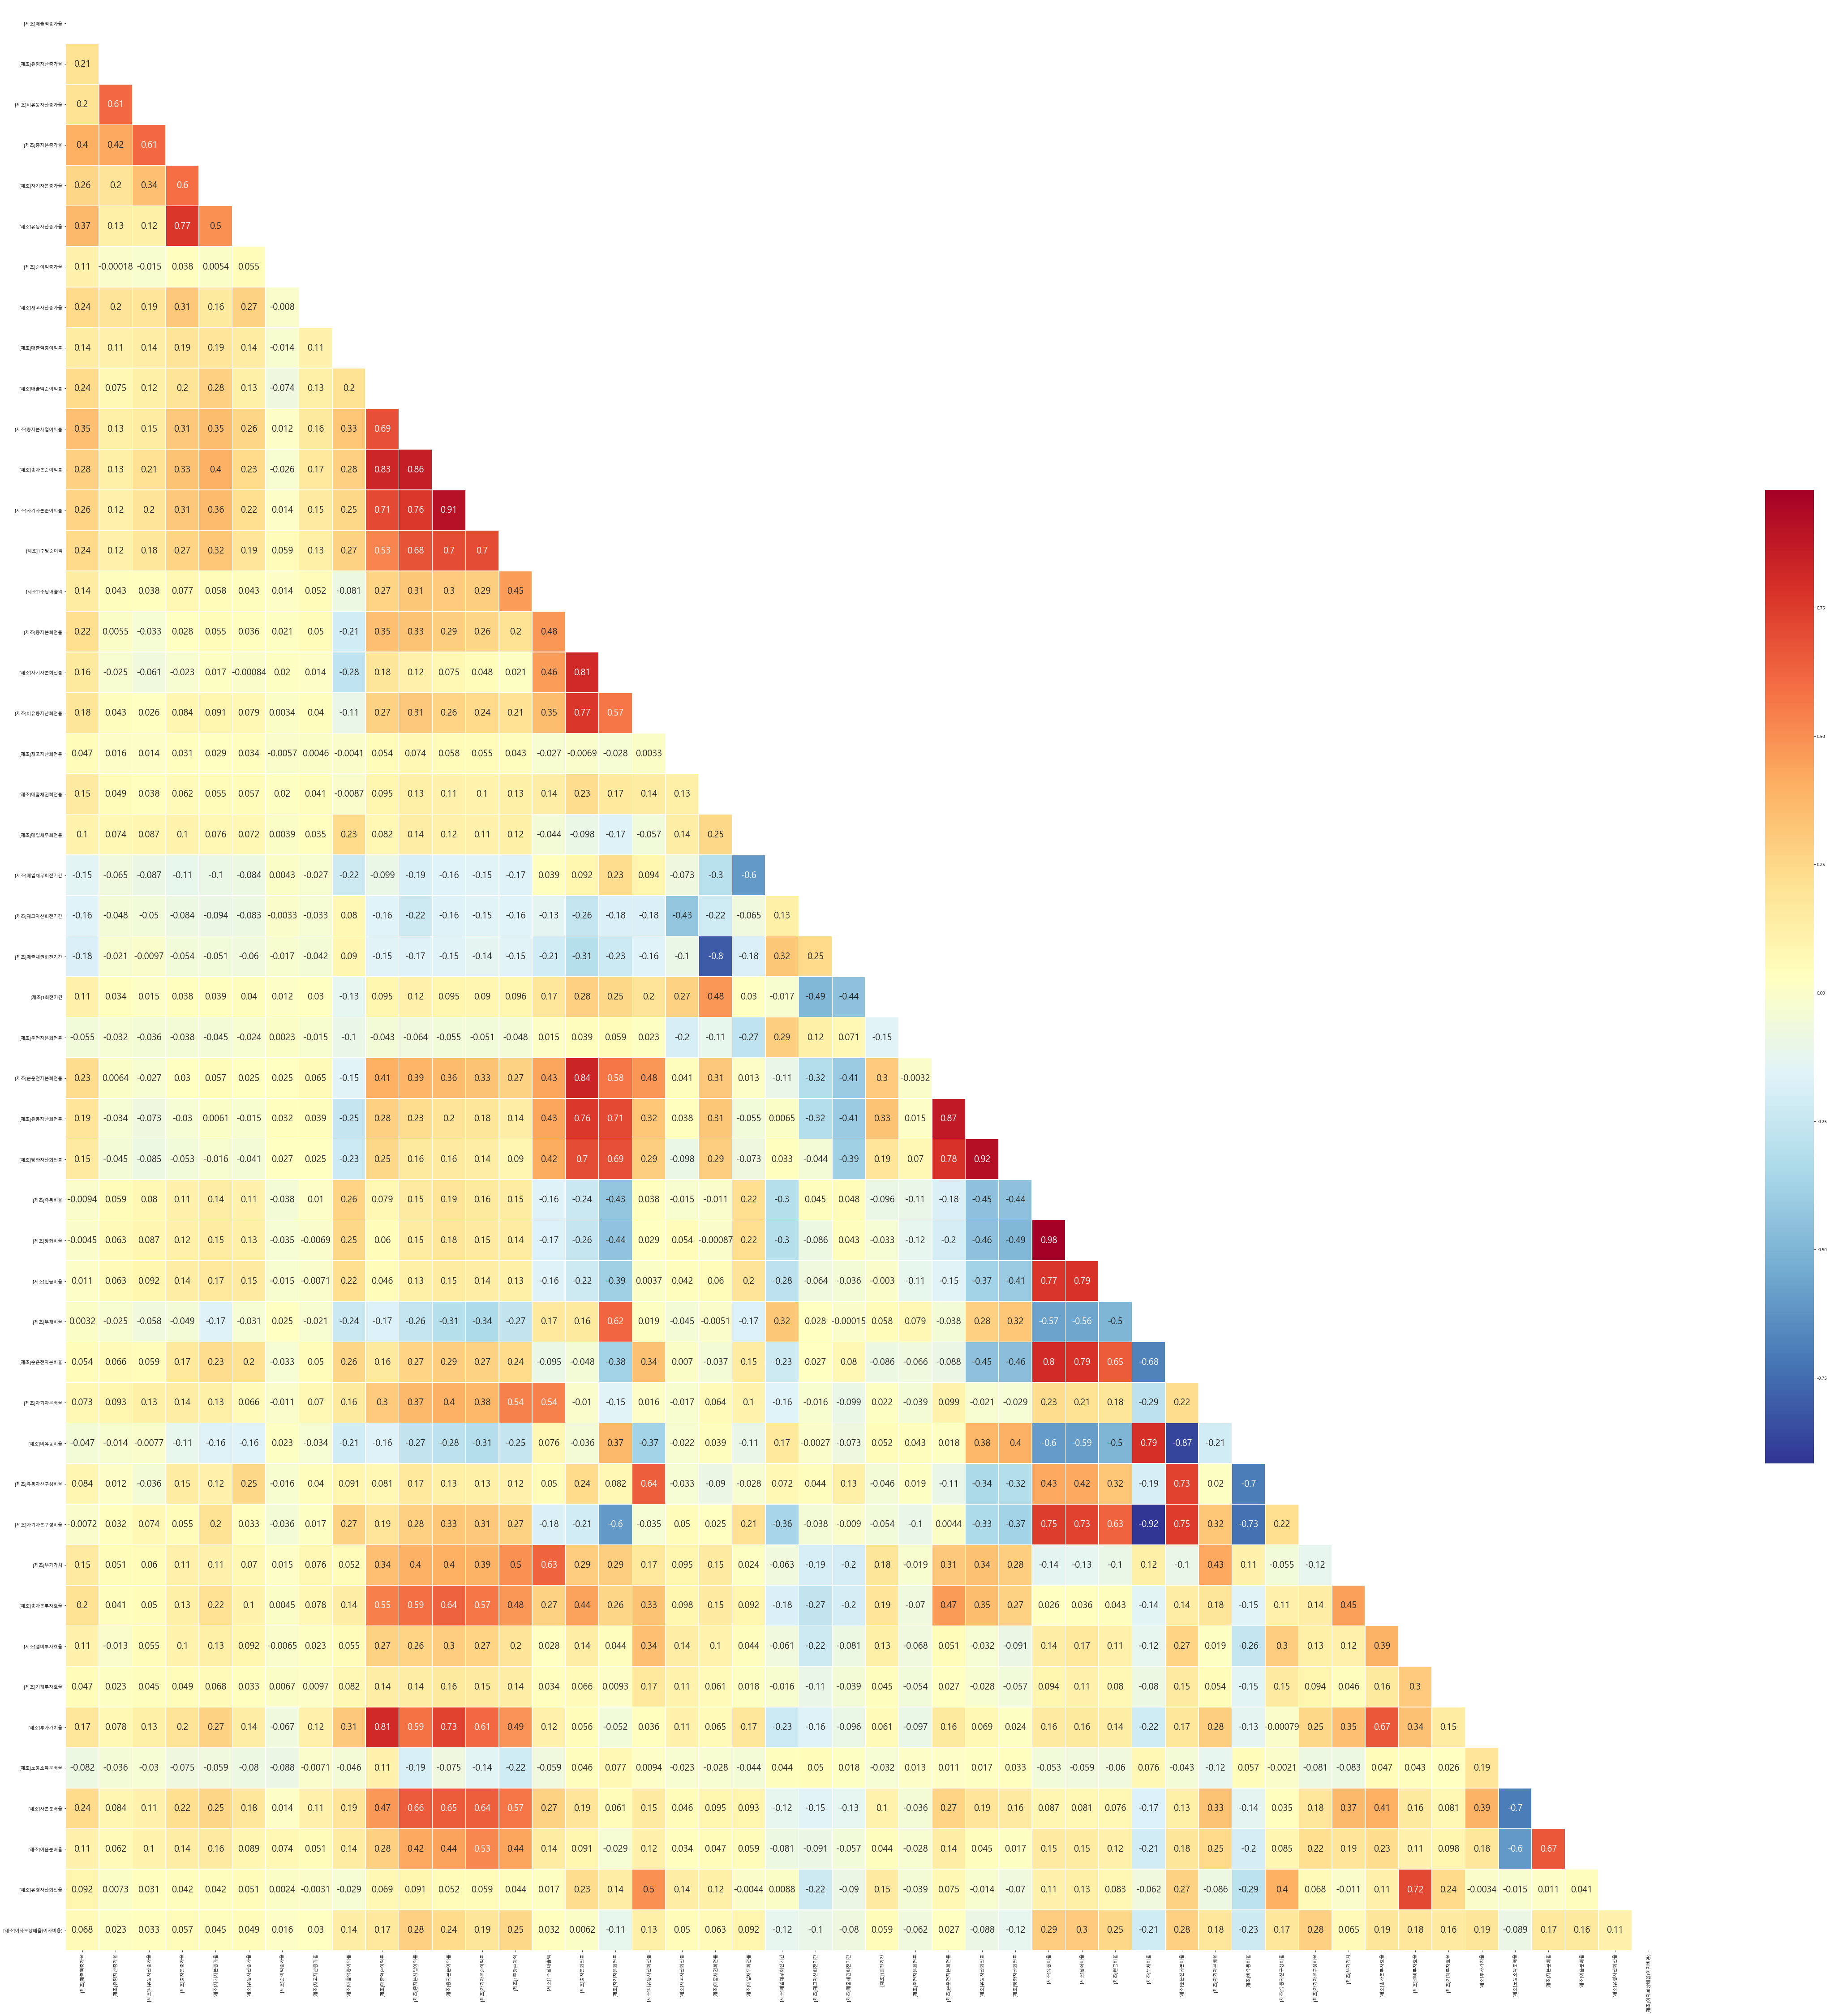

In [27]:
# corr 시각화
def corr_heatmap(dataset, method_option = 'pearson'):

    
    # heatmap 그리기
    mask_ut=np.triu(np.ones(dataset.corr().shape)).astype(bool) 
    plt.figure(figsize=(80,80))
    sns.heatmap(dataset.corr(method=method_option), annot = True, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5}, 
                annot_kws={"size": 20}, linewidths=.5, mask=mask_ut)
    plt.show()

# 함수 사용
corr_heatmap(df_scaled_df)

In [29]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df_scaled_df)

,VIF Factor,features
0,61.515651,[제조]유동비율
1,60.704993,[제조]당좌비율
2,27.197229,[제조]유동자산회전률
3,27.086819,[제조]총자본회전률
4,22.466931,[제조]부채비율
5,20.243287,[제조]순운전자본회전률
6,19.024279,[제조]순운전자본비율
7,18.118817,[제조]유동자산구성비율
8,17.602137,[제조]비유동비율
9,16.079154,[제조]자기자본구성비율


In [41]:
from scipy.stats import shapiro,anderson,jarque_bera,kstest

In [34]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '산업명', '소속코드', '[제조]매출액증가율',
       '[제조]유형자산증가율', '[제조]비유동자산증가율', '[제조]총자본증가율', '[제조]자기자본증가율',
       '[제조]유동자산증가율', '[제조]순이익증가율', '[제조]재고자산증가율', '[제조]매출액총이익률',
       '[제조]매출액순이익률', '[제조]총자본사업이익률', '[제조]총자본순이익률', '[제조]자기자본순이익률',
       '[제조]1주당순이익', '[제조]1주당매출액', '[제조]총자본회전률', '[제조]자기자본회전률', '[제조]비유동자산회전률',
       '[제조]재고자산회전률', '[제조]매출채권회전률', '[제조]매입채무회전률', '[제조]매입채무회전기간',
       '[제조]재고자산회전기간', '[제조]매출채권회전기간', '[제조]1회전기간', '[제조]운전자본회전률',
       '[제조]순운전자본회전률', '[제조]유동자산회전률', '[제조]당좌자산회전률', '[제조]유동비율', '[제조]당좌비율',
       '[제조]현금비율', '[제조]부채비율', '[제조]순운전자본비율', '[제조]자기자본배율', '[제조]비유동비율',
       '[제조]유동자산구성비율', '[제조]자기자본구성비율', '[제조]부가가치', '[제조]총자본투자효율', '[제조]설비투자효율',
       '[제조]기계투자효율', '[제조]부가가치율', '[제조]노동소득분배율', '[제조]자본분배율', '[제조]이윤분배율',
       '[제조]유형자산회전율', '[제조]이자보상배율(이자비용)', 'year', 'month', 'label'],
      dtype='object')

In [35]:
dfn = df[['[제조]매출액증가율',
       '[제조]유형자산증가율', '[제조]비유동자산증가율', '[제조]총자본증가율', '[제조]자기자본증가율',
       '[제조]유동자산증가율', '[제조]순이익증가율', '[제조]재고자산증가율', '[제조]매출액총이익률',
       '[제조]매출액순이익률', '[제조]총자본사업이익률', '[제조]총자본순이익률', '[제조]자기자본순이익률',
       '[제조]1주당순이익', '[제조]1주당매출액', '[제조]총자본회전률', '[제조]자기자본회전률', '[제조]비유동자산회전률',
       '[제조]재고자산회전률', '[제조]매출채권회전률', '[제조]매입채무회전률', '[제조]매입채무회전기간',
       '[제조]재고자산회전기간', '[제조]매출채권회전기간', '[제조]1회전기간', '[제조]운전자본회전률',
       '[제조]순운전자본회전률', '[제조]유동자산회전률', '[제조]당좌자산회전률', '[제조]유동비율', '[제조]당좌비율',
       '[제조]현금비율', '[제조]부채비율', '[제조]순운전자본비율', '[제조]자기자본배율', '[제조]비유동비율',
       '[제조]유동자산구성비율', '[제조]자기자본구성비율', '[제조]부가가치', '[제조]총자본투자효율', '[제조]설비투자효율',
       '[제조]기계투자효율', '[제조]부가가치율', '[제조]노동소득분배율', '[제조]자본분배율', '[제조]이윤분배율',
       '[제조]유형자산회전율', '[제조]이자보상배율(이자비용)']]

In [38]:
list = [10000,9000,8000,7000,6000,5000,4000, 2800, 2000]
df_nc = dfn.columns.tolist()

In [40]:
## shapiro - wilk test
for i in list:
    df_k = df.sample(n=i, random_state=3)
    for j in df_nc:
        a = stats.shapiro(df_k[j])
        p = a.pvalue
        if p < 0.1:
            print(i,j,p)
            continue
        else :
            print(i,p)
            break

10000 [제조]매출액증가율 2.2420775429197073e-44
10000 [제조]유형자산증가율 0.0
10000 [제조]비유동자산증가율 0.0
10000 [제조]총자본증가율 0.0
10000 [제조]자기자본증가율 0.0
10000 [제조]유동자산증가율 0.0
10000 [제조]순이익증가율 0.0
10000 [제조]재고자산증가율 0.0
10000 [제조]매출액총이익률 0.0
10000 [제조]매출액순이익률 0.0
10000 [제조]총자본사업이익률 0.0
10000 [제조]총자본순이익률 0.0
10000 [제조]자기자본순이익률 0.0
10000 [제조]1주당순이익 0.0
10000 [제조]1주당매출액 0.0
10000 [제조]총자본회전률 4.203895392974451e-45
10000 [제조]자기자본회전률 0.0
10000 [제조]비유동자산회전률 0.0
10000 [제조]재고자산회전률 0.0
10000 [제조]매출채권회전률 0.0
10000 [제조]매입채무회전률 0.0
10000 [제조]매입채무회전기간 0.0
10000 [제조]재고자산회전기간 0.0
10000 [제조]매출채권회전기간 0.0
10000 [제조]1회전기간 0.0
10000 [제조]운전자본회전률 0.0
10000 [제조]순운전자본회전률 7.058972630671207e-38
10000 [제조]유동자산회전률 0.0
10000 [제조]당좌자산회전률 0.0
10000 [제조]유동비율 0.0
10000 [제조]당좌비율 0.0
10000 [제조]현금비율 0.0
10000 [제조]부채비율 0.0
10000 [제조]순운전자본비율 7.457786963700132e-32
10000 [제조]자기자본배율 0.0
10000 [제조]비유동비율 0.0
10000 [제조]유동자산구성비율 1.0098822055032985e-29
10000 [제조]자기자본구성비율 2.970752744368612e-43
10000 [제조]부가가치 0.0
10000 [제조]총자본투자효율 0.0
10000 [제조]설비투자효율 0.0
10000

In [42]:
## shapiro - wilk test
for i in list:
    df_k = df.sample(n=i, random_state=3)
    for j in df_nc:
        a = kstest(df_k[j], 'norm')
        p = a.pvalue
        if p < 0.1:
            print(i,j,p)
            continue
        else :
            print(i,p)
            break

10000 [제조]매출액증가율 0.0
10000 [제조]유형자산증가율 0.0
10000 [제조]비유동자산증가율 0.0
10000 [제조]총자본증가율 0.0
10000 [제조]자기자본증가율 0.0
10000 [제조]유동자산증가율 0.0
10000 [제조]순이익증가율 0.0
10000 [제조]재고자산증가율 0.0
10000 [제조]매출액총이익률 0.0
10000 [제조]매출액순이익률 0.0
10000 [제조]총자본사업이익률 0.0
10000 [제조]총자본순이익률 0.0
10000 [제조]자기자본순이익률 0.0
10000 [제조]1주당순이익 0.0
10000 [제조]1주당매출액 0.0
10000 [제조]총자본회전률 0.0
10000 [제조]자기자본회전률 0.0
10000 [제조]비유동자산회전률 0.0
10000 [제조]재고자산회전률 0.0
10000 [제조]매출채권회전률 0.0
10000 [제조]매입채무회전률 0.0
10000 [제조]매입채무회전기간 0.0
10000 [제조]재고자산회전기간 0.0
10000 [제조]매출채권회전기간 0.0
10000 [제조]1회전기간 0.0
10000 [제조]운전자본회전률 0.0
10000 [제조]순운전자본회전률 0.0
10000 [제조]유동자산회전률 0.0
10000 [제조]당좌자산회전률 0.0
10000 [제조]유동비율 0.0
10000 [제조]당좌비율 0.0
10000 [제조]현금비율 0.0
10000 [제조]부채비율 0.0
10000 [제조]순운전자본비율 0.0
10000 [제조]자기자본배율 0.0
10000 [제조]비유동비율 0.0
10000 [제조]유동자산구성비율 0.0
10000 [제조]자기자본구성비율 0.0
10000 [제조]부가가치 0.0
10000 [제조]총자본투자효율 0.0
10000 [제조]설비투자효율 0.0
10000 [제조]기계투자효율 0.0
10000 [제조]부가가치율 0.0
10000 [제조]노동소득분배율 0.0
10000 [제조]자본분배율 0.0
10000 [제조]이윤분배율 0.0
10000 [제조]유형